In [1]:
%run ../scripts/Requirements.ipynb
%run ../scripts/Inventory_Importer.ipynb
%run ../scripts/Figure_Styles.ipynb
%run ../scripts/Country_ISO_Codes.ipynb
%run ../scripts/Figure_Saver.ipynb

repo & folder name: Greenhouse-Data
Requirements imported!
Inventories imported!
current figure and save dpi = 160; current single fig size = (8, 4)
styles imported!
Imported COUNTRY_DICT & CODE_GENERATOR_ISO3
fig_country_saver imported!


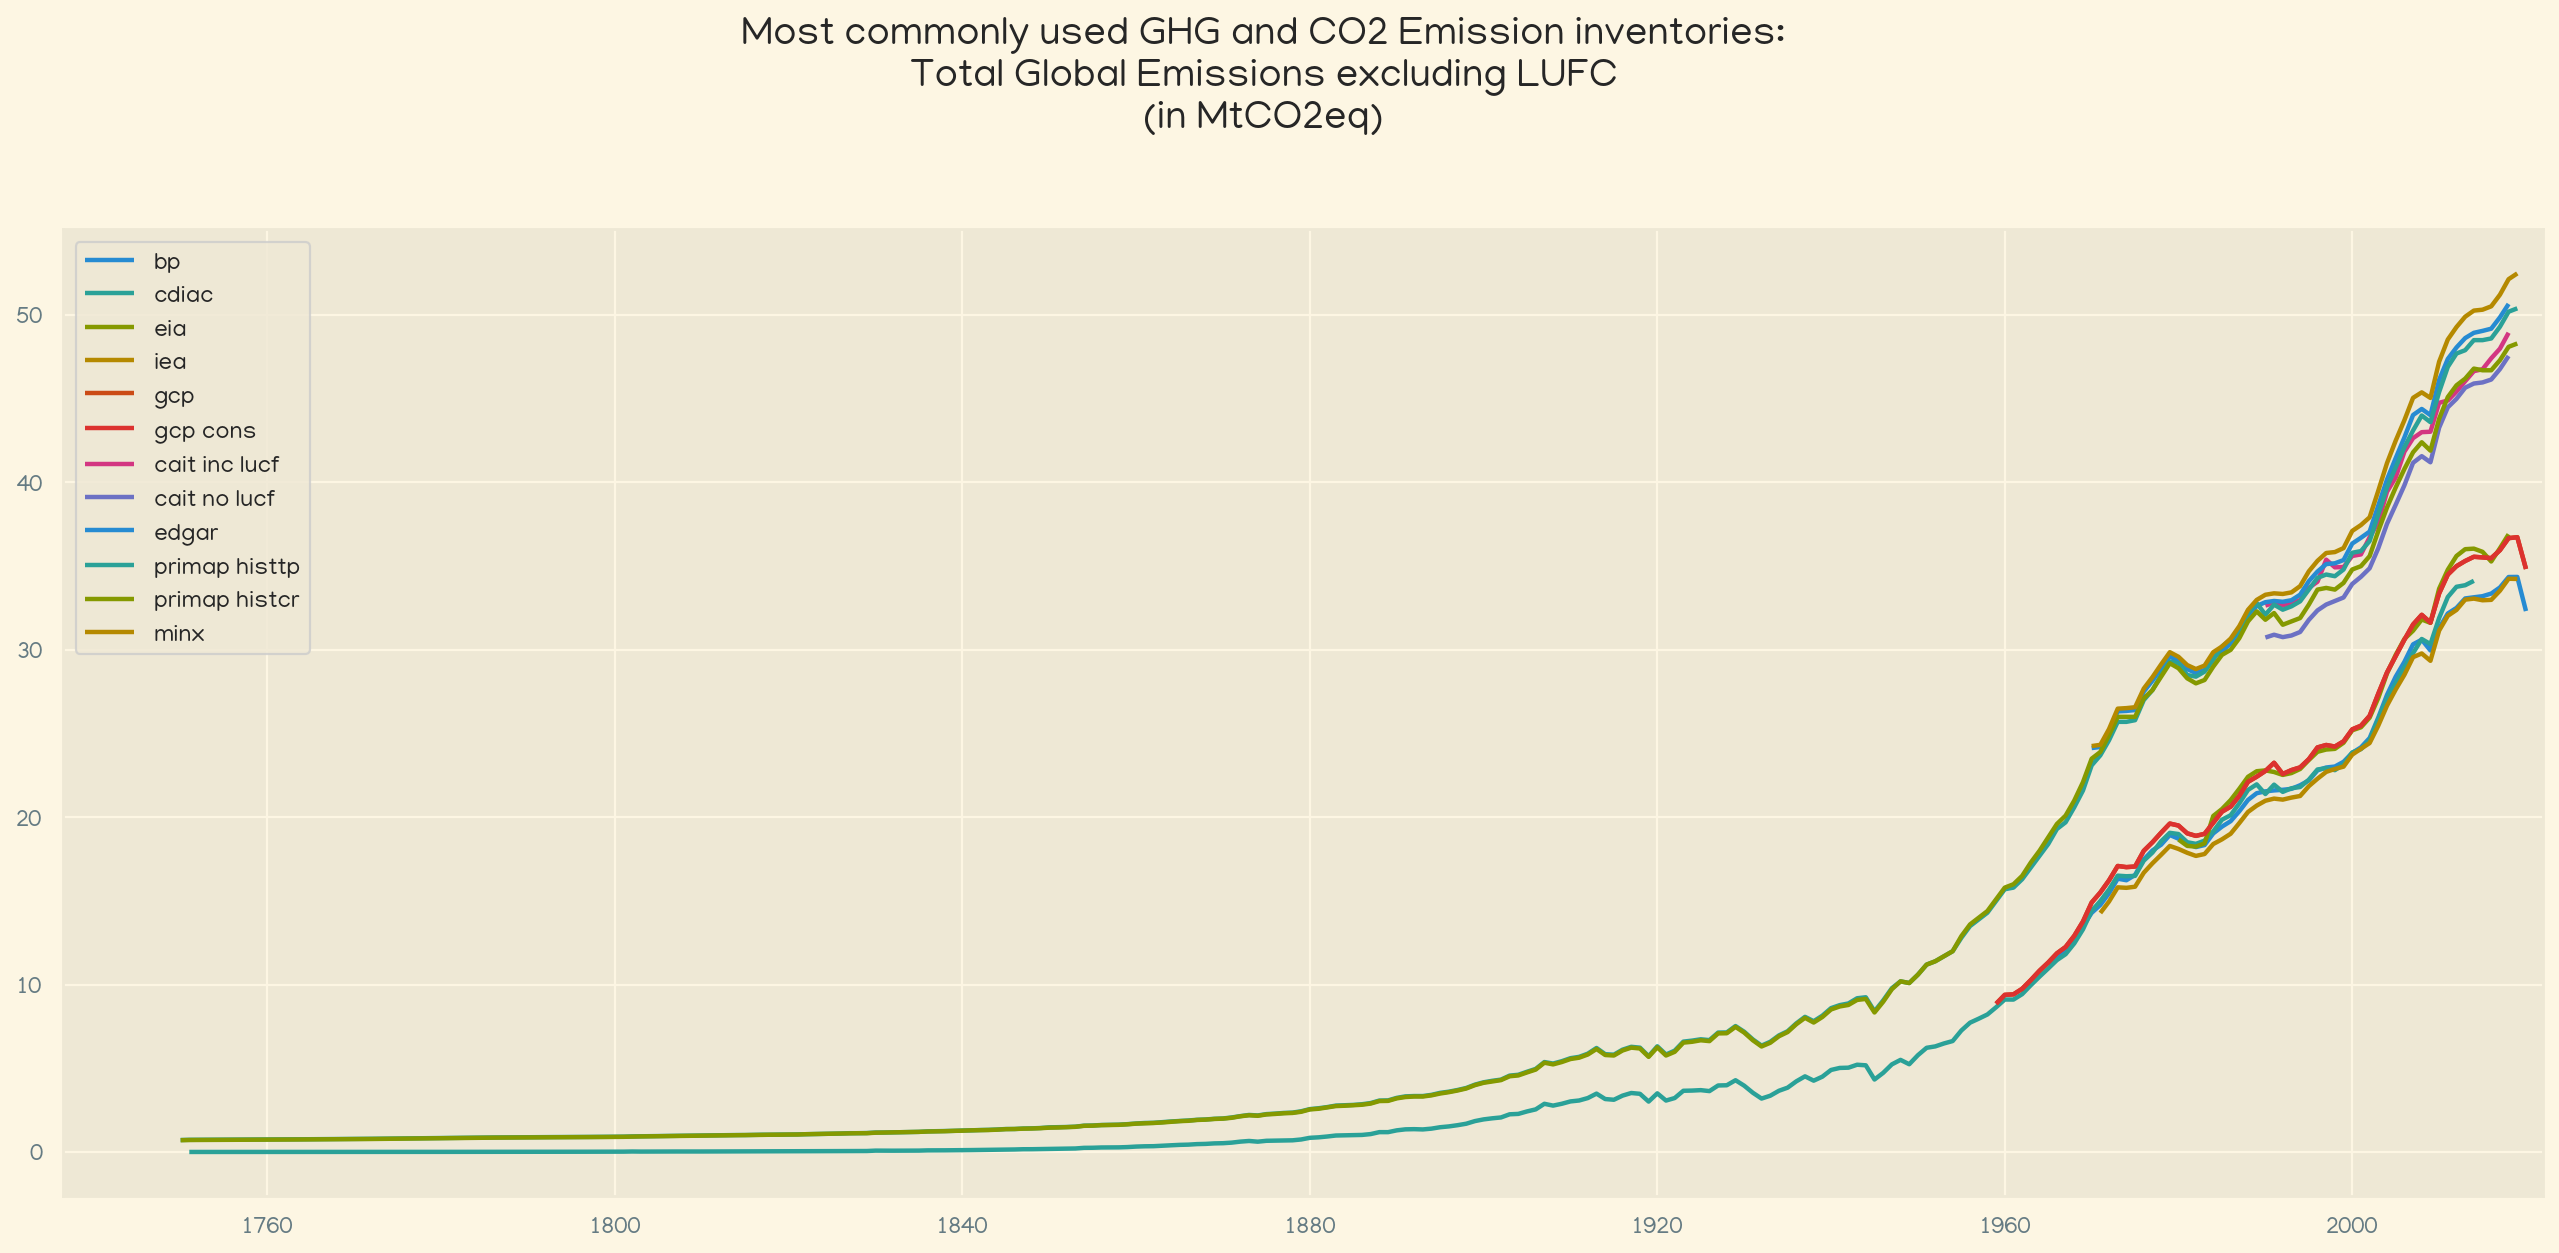

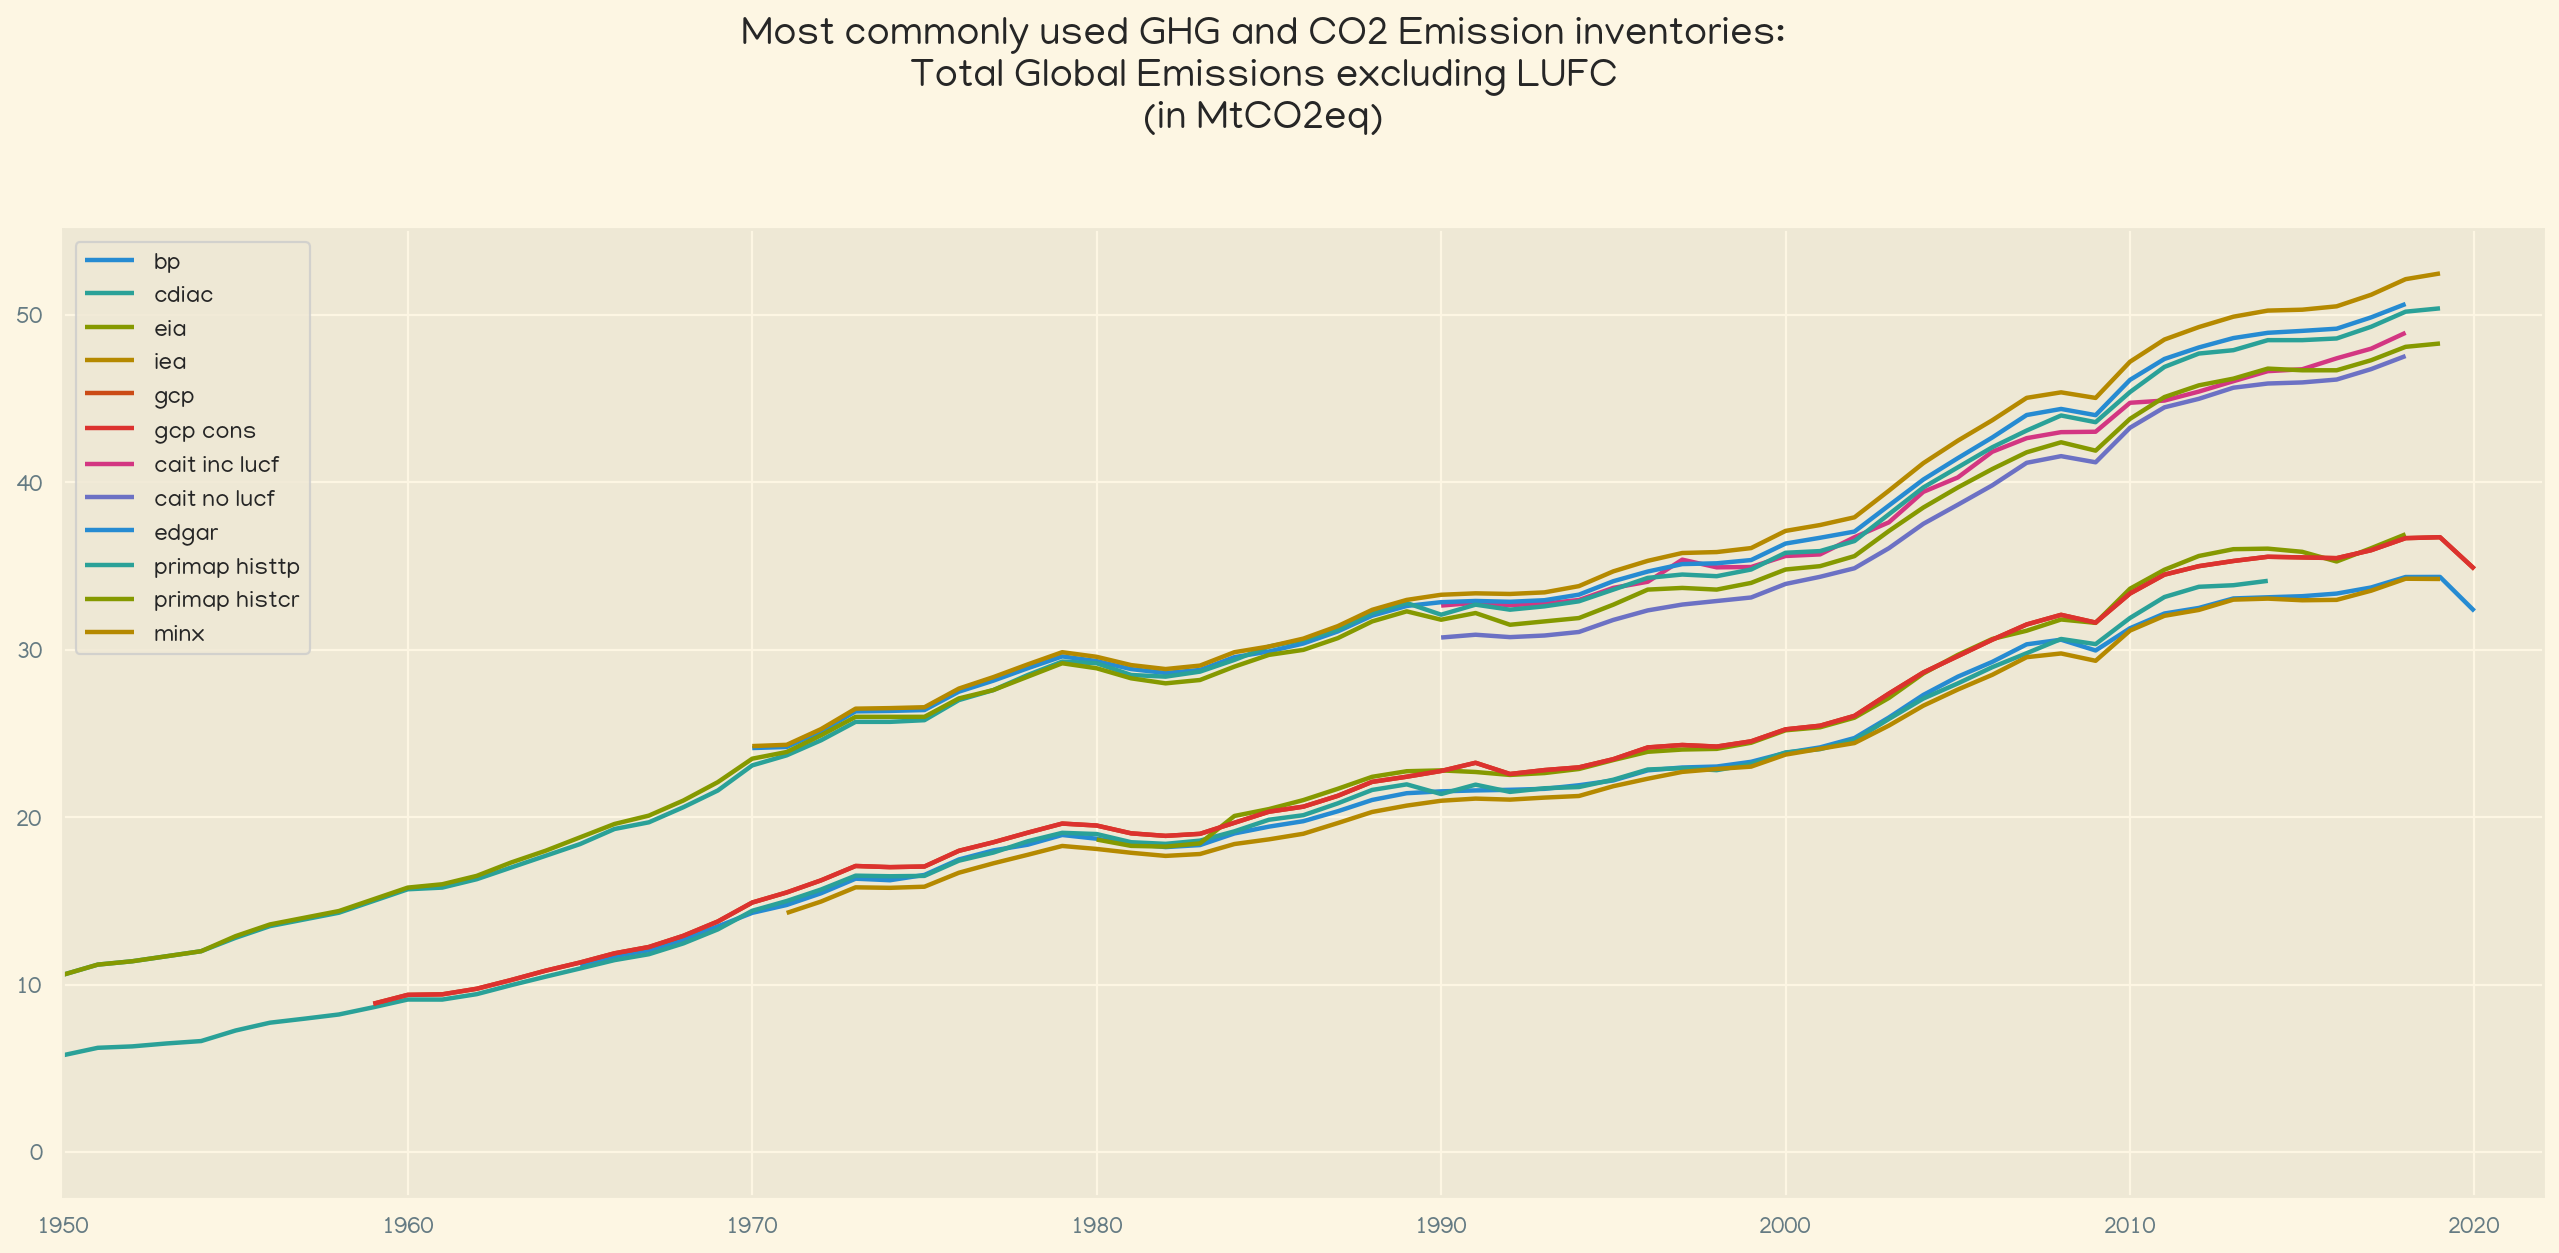

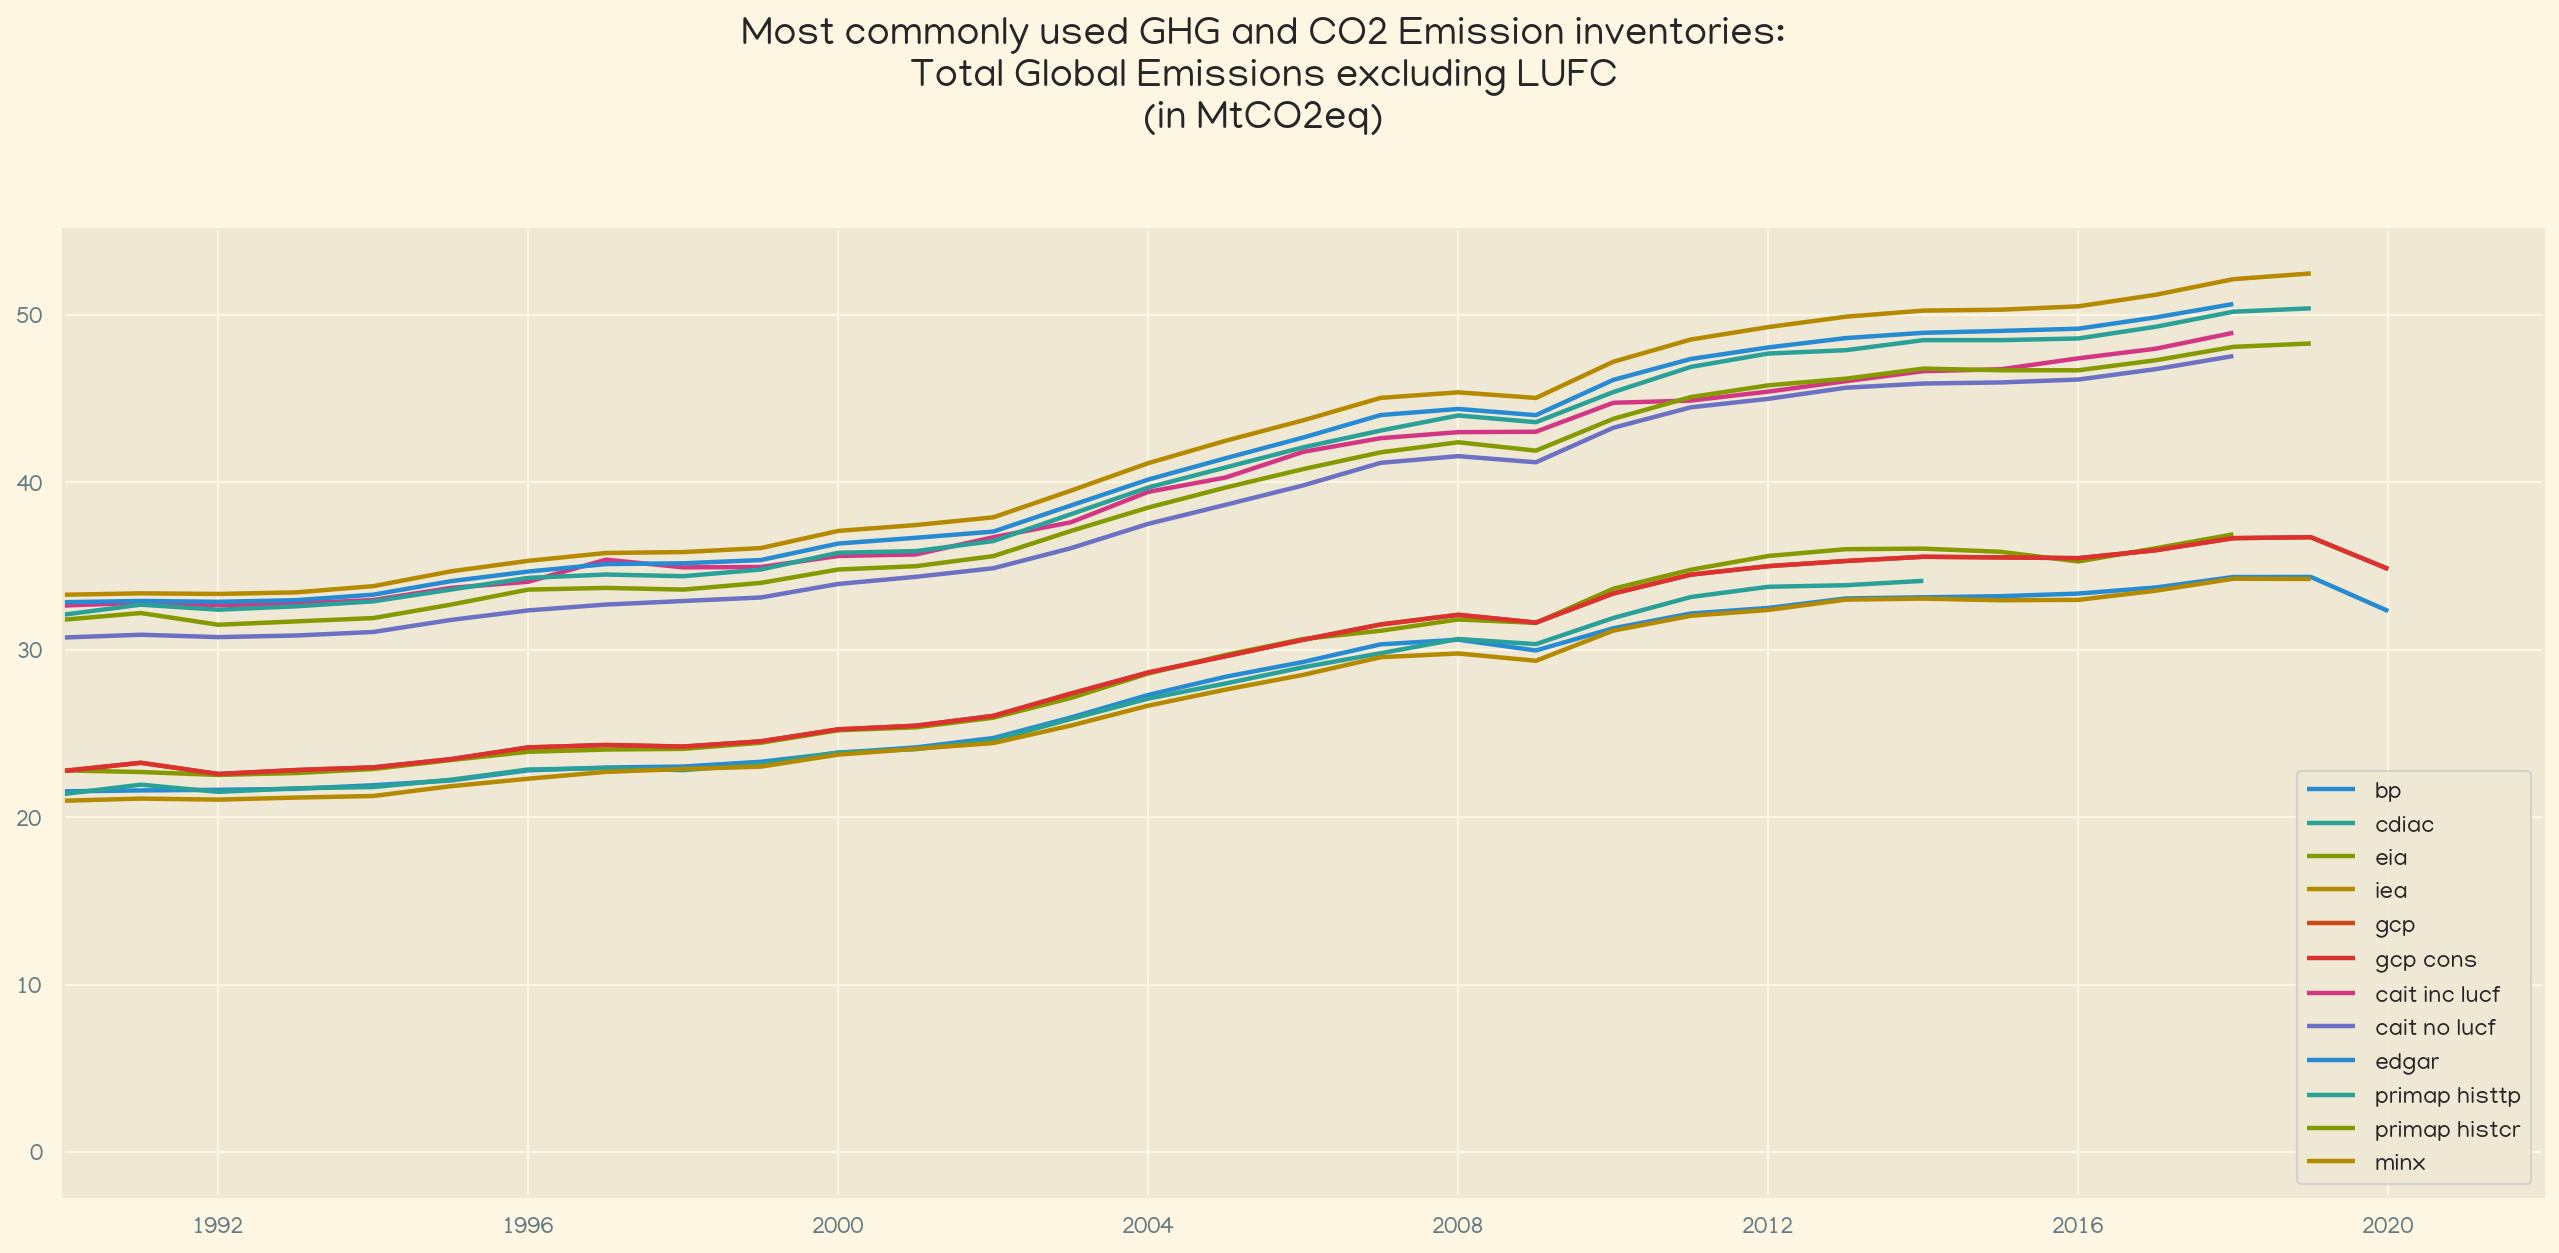

In [36]:
#co2
bp = df_bp_global.loc[1965:] / 1000
cdiac = df_cdiac_global.loc[:,"Total CO2 emissions from fossil-fuels and cement production (MtCO2)"] / 1000
eia = df_eia_global.loc[df_eia_global.fuel=="Total CO2 emissions",:].set_index("fuel").squeeze()["1980":] / 1000
iea = df_iea_global.loc[df_iea_global.type=="total_fuel_combustion"].set_index("type").squeeze()["1971":] / 1000
gcp = df_gcp_global.squeeze().loc[1959:] / 1000
gcp_cons = df_gcp_cons_global.squeeze().loc[1959:] / 1000

# cait
df_cait_global_yes_lucf = df_cait_global[(df_cait_global.Sector == "Total including LUCF") & (df_cait_global.Gas=="All GHG")].squeeze()["1990":] / 1000
df_cait_global_no_lucf = df_cait_global[(df_cait_global.Sector == "Total excluding LUCF") & (df_cait_global.Gas=="All GHG")].squeeze()["1990":] / 1000

# edgar
edgar = df_edgar_global.sum() / 1000

# primap
primap_global_histtp = df_primap_global[(df_primap_global["scenario (PRIMAP-hist)"]=="HISTTP") & 
                                           (df_primap_global["category (IPCC2006_PRIMAP)"]=="M.0.EL") &
                                           (df_primap_global["entity"]=="KYOTOGHG (AR4GWP100)")
                                          ].squeeze()["1750":] / 1000000
primap_global_histcr = df_primap_global[(df_primap_global["scenario (PRIMAP-hist)"]=="HISTCR") & 
                                           (df_primap_global["category (IPCC2006_PRIMAP)"]=="M.0.EL") &
                                           (df_primap_global["entity"]=="KYOTOGHG (AR4GWP100)")
                                          ].squeeze()["1750":] / 1000000

#minx
minx = df_minx_global.groupby(["year"]).sum().value_ar6.loc[1970:2019]/1000000000

# all dfs
list_global_emissions = [(bp,'bp'), 
                         (cdiac, "cdiac"),
                         (eia, "eia"),
                         (iea,"iea"),
                         (gcp, "gcp"),
                         (gcp_cons, "gcp cons"),
                         (df_cait_global_yes_lucf, "cait inc lucf"),
                         (df_cait_global_no_lucf, "cait no lucf"),
                         (edgar, "edgar"), 
                         (primap_global_histtp, "primap histtp"), 
                         (primap_global_histcr, "primap histcr"), 
                         (minx, "minx")]

# -------------------------------------------------------------------------------------------------------------------------------------------------------

def plot_global_totals1(xmin=None, xmax=None):
    fig, axs = plt.subplots(1,1, figsize=(20,8))
    fig.suptitle("Most commonly used GHG and CO2 Emission inventories:\nTotal Global Emissions excluding LUFC\n(in MtCO2eq)", fontsize=18,y=1.047)

    lines = []
    for i in range(len(list_global_emissions)):
        # display(list_global_emissions[i][0])
        axs.plot(pd.to_datetime(list_global_emissions[i][0].index, format = "%Y"), 
                 list_global_emissions[i][0], 
                 label = list_global_emissions[i][1])
        # print(f"finished {list_global_emissions[i][1]}")

    axs.set_xlim(xmin, xmax)

    axs.legend()

    fig.savefig("global/ghg_and_co2_totals.png", bbox_inches="tight")
    # display(axs.get_xticks())

#### ------------- last one gets saved

plot_global_totals1(None, datetime.datetime(2022, 1,1))

plot_global_totals1(datetime.datetime(1950, 1,1), datetime.datetime(2022, 1,1))

plot_global_totals1(datetime.datetime(1990, 1,1), datetime.datetime(2022, 1,1))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


FileNotFoundError: [Errno 2] No such file or directory: '../country_data/BOL_Bolivia/figures/BOL_UNFCCC_AI_1.png'

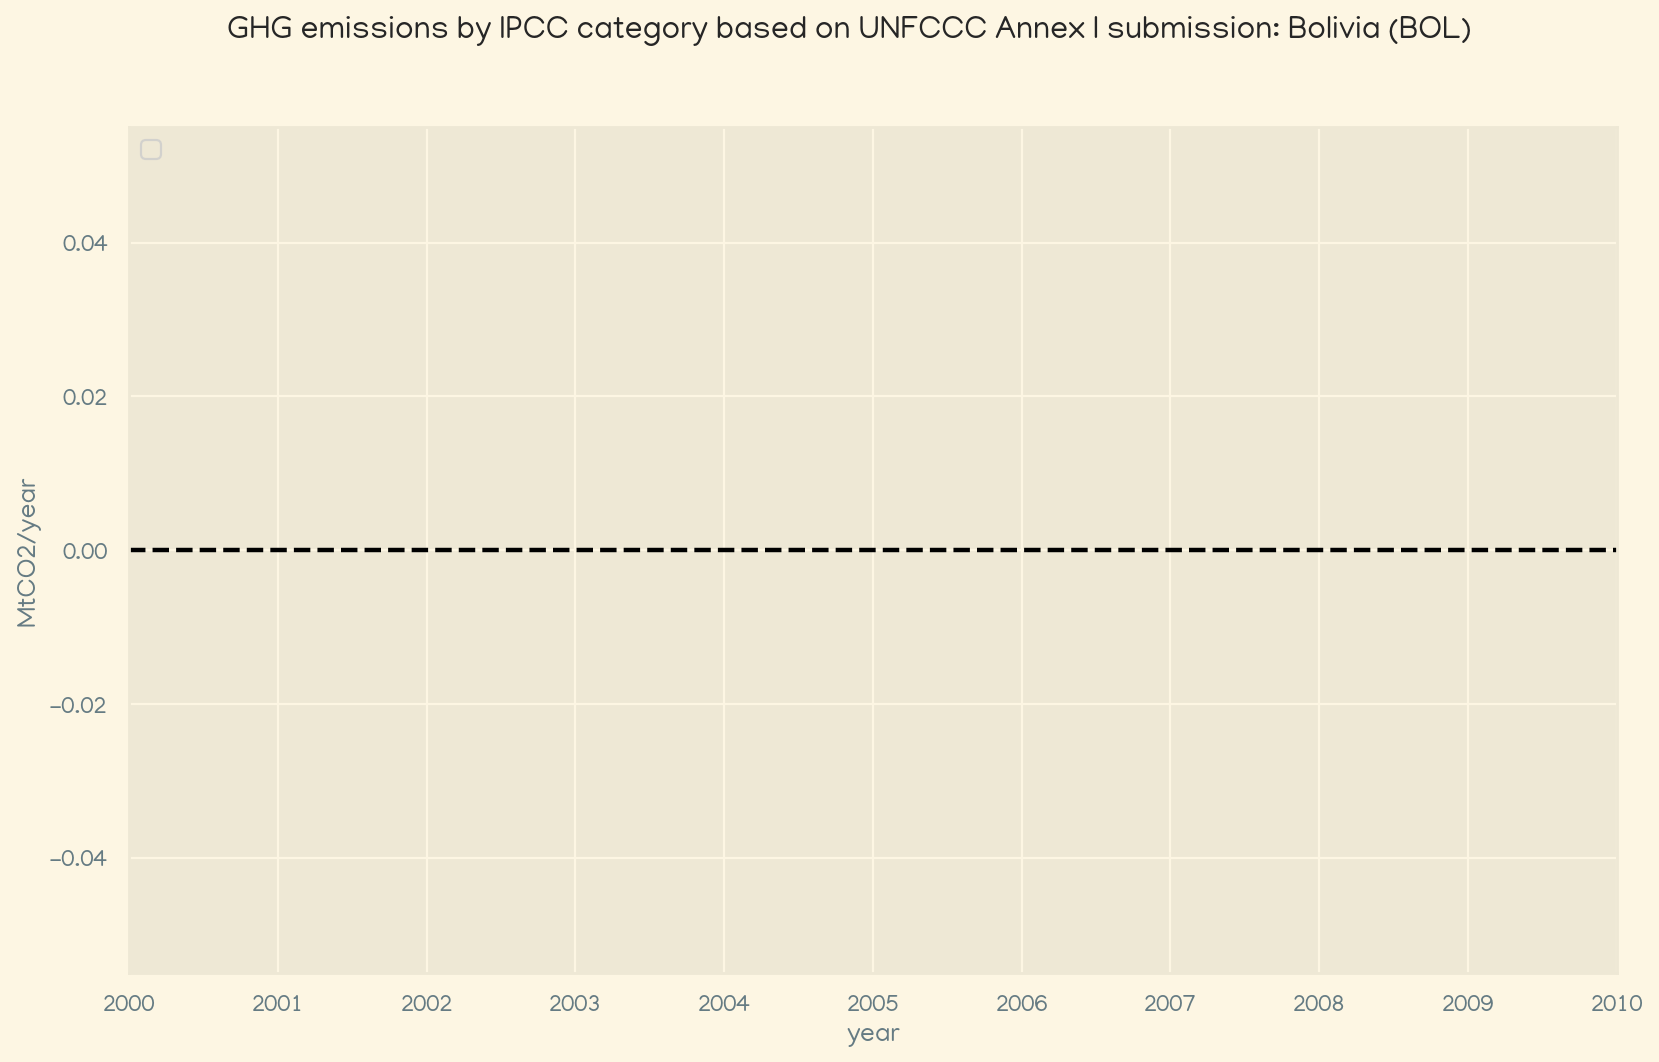

In [35]:
# COPIED FROM 1.1, I DUNNO WHY


df_unfccc_ai = df_unfccc_ai[df_unfccc_ai.code.notna()].reset_index().drop("index", axis=1)

#------------------------------------------------------------------------------------

def plot_unfccc_ai_totals(code, close=False):
    fig, axs = plt.subplots(1,1, figsize = (12,7))
    fig.suptitle(f"GHG emissions by IPCC category based on UNFCCC Annex I submission: {STANDARD_COUNTRY_DICT[code]} ({code})")
    
    df = df_unfccc_ai[df_unfccc_ai.code==code]
    df = df[df['Parent Category']=="Totals"]
    df = df[df.Gas=="Aggregate GHGs"]
    df = df.iloc[:5,:]
    df = df.set_index("Category")    
    df = df.loc[:,"1990":].T
    df.index = pd.to_datetime(df.index)
    
    axs.plot(df, label=df.columns, marker="o")
    axs.axhline(0,color="black", ls="--")
    
    axs.set_ylabel("MtCO2/year")
    axs.set_xlabel("year")

    axs.legend(loc="upper left")
    
    fig_country_saver(fig, code, "UNFCCC_AI_1")
    
    if close == True:
        plt.close()

plot_unfccc_ai_totals(code="BOL")

In [30]:
# fig, axs = plt.subplots(1,1,figsize=(10,7), dpi=150)

# fig.suptitle("Most commonly used GHG and CO2 Emission inventories:\nTotal Global Emissions excluding LUFC\n(in MtCO2eq)", fontsize=18,y=1.047)

# # axs.set_prop_cycle(color = plt.get_cmap("tab10", 12)(range(12)))
# # axs.set_facecolor("gainsboro")

# ########## GHGs
# axs.plot(EDGAR_GHG_global["All GHG"], label="EDGAR v5 - GHGs (no F-Gases)", linestyle=":")
# var1 = PRIMAP_GHG_global.iloc[149,6:] #HISTTP
# var1.index = var1.index.astype(float)
# axs.plot(var1, label="PRIMAP HISTTP - GHGs")
# var1_cr = PRIMAP_GHG_global.loc[7912,:][6:] #HISTCR
# var1_cr.index = var1_cr.index.astype(float)
# axs.plot(var1_cr, label="PRIMAP HISTCR - GHGs", color="g", linestyle=":")

# var2 = df_CAIT_global.iloc[1,7:]
# var2.index = var2.index.astype(float)
# axs.plot(var2, label="CAIT - GHG", linestyle=":")
# var23 = df_minx.groupby("year").sum()
# axs.plot(var23.index, var23.GHG/1000000, label = "Minx et al 2021 - GHG")
# axs.plot([2015,2016,2017,2018,2019,2020], df_trace.groupby("start").sum().iloc[:,-1]/1000000, label="TRACE - GHG")

# ########## CO2
# axs.plot(bp_df_global,label="BP - CO2 (aggregate from FF)")
# axs.plot(EDGAR_GHG_global.index.astype(float), EDGAR_GHG_global.CO2, label="EDGAR v5 - CO2", linestyle=":")
# axs.plot(CDIAC_CO2_global.iloc[:,0], label="CDIAC - CO2")
# var3 = df_GCP_CW_global.iloc[0,7:]
# var3.index = var3.index.astype(float)
# axs.plot(var3, label="GCP 2020 - CO2")
# var3_2021 = df_GCP_2021[df_GCP_2021.country=="World"].iloc[0,2:] #new
# var3_2021.index = var3_2021.index.astype(float) #new
# axs.plot(var3_2021, label="GCP 2021 - CO2") #new
# var4 = df_CAIT_global.iloc[4,7:]
# var4.index = var4.index.astype(float)
# axs.plot(var4, label="CAIT - CO2", linestyle=":")
# var5 = df_eia_all[df_eia_all.country=="World"].iloc[0,34:-2]
# var5.index = var5.index.astype(float)
# axs.plot(var5, label="EIA - CO2", linestyle=":", color='grey')

# var56 = df_IEA[df_IEA.country=="World"].iloc[2,:-2][4:]
# var56.index = var56.index.astype(int)
# axs.plot(var56.index, var56.values, label="IEA - CO2")

# var6 = df_minx.groupby("year").sum()
# axs.plot(var6.index, var6.CO2/1000000, label = "Minx et al 2021 - CO2")


# #other - EPA
# # axs.plot(EPA_nonCO2_df_global.index, EPA_nonCO2_df_global.total, label="EPA - all NON-CO2 emissions")

# # axs.grid(alpha=0.)
# axs.set_xlim(1950,2021)
# axs.set_xlabel("year")

# # axs.set_yscale("log")
# yticks=[10000,20000,30000,40000,50000]
# axs.set_yticks(yticks)
# axs.set_yticklabels(yticks)
# axs.set_ylim(7000,55000)
# axs.set_ylabel("MtCO2e")

# axs.annotate("All GHG", (2021, 50000))
# axs.annotate("CO2-only", (2021, 35000))


# for i in range(15):
#     axs.lines[i].set_linewidth(3)
    
# axs.lines[7].set_linewidth(10)
# axs.lines[8].set_linewidth(6)
# axs.lines[-1].set_color("black")


# axs.legend(fontsize=10, loc="best", markerscale=5, labelcolor='linecolor')